# Seattle Airbnb Open Data
A sneak peek into the Airbnb activity in Seattle, WA, USA

## Description

### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle dataset:

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

### Inspiration
Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
For more ideas, visualizations of all Seattle datasets can be found [here](http://insideairbnb.com/seattle/).

### Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

## 1. Import Libs

In [1]:
# import libs

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import seaborn as sns
import warnings

from IPython.display import display, HTML
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from os import getcwd
from os import path
from pandas_profiling import ProfileReport
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# nltk downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Some configs

In [3]:
# display all columns
pd.set_option('max_columns', None)

# display a max of 10 rows only
pd.set_option('max_rows', 10)

# justify col headers to the left
pd.set_option('colheader_justify', 'left')

# suppress warnings
#warnings.simplefilter(action='ignore', category='FutureWarning')

# renders the figure in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline

# tinker with the font sizes
plt.figure()
plt.rcParams.update({'font.size': 12});

# nltk words download
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Oluga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<Figure size 432x288 with 0 Axes>

## 3. Load the data

In [4]:
#load data
calendar = pd.read_csv('./data/calendar.csv', parse_dates=['date'])
listings = pd.read_csv('./data/listings.csv', parse_dates=['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review'])
reviews = pd.read_csv('./data/reviews.csv', parse_dates=['date'])

## 4. Some Helper Functions

_**Helper Function 1: convert price from type string to float**_

In [5]:
# convert price to float
def convert_price_to_float(df, cols):
    for col in cols:
        print('Converting', col, '...')
        df[col] = df[col].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')
#     return df


_**Helper Function 2: create a dataframe's pandas_profile**_

In [6]:
def show_pandas_profile(df, df_name):
    '''
    df is the actual dataframe (it is not a string)
    df_name is the string representing the df
    
    they are similar, but df_name is in quotes and df is not in quotes
    '''

    f_name = './pandas_profiles/' + df_name + '_profile.html'
    if path.exists(f_name):
        display(HTML(filename=f_name))
    else:
        profile = ProfileReport(df, minimal = True)
        profile.to_file(output_file=f_name)
        return profile

_**Helper Function 3: display wordcloud**_

In [7]:
def display_wordcloud(text):
    
    d = getcwd()

    try:
        mask = np.array(Image.open(path.join(d, 'images/NicePng_seattle-png_2051033.png')))
        background_color = 'white'
    except:
        mask = None
        background_color = None
    
    wordcloud = WordCloud(width = 600, height = 500, mask=mask, contour_width=1, background_color=background_color).generate(text)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## 5. Data Wrangling & EDA on `calendar` Dataframe

In [8]:
calendar.sample(5)

,listing_id,date,available,price
209495,8293287,2016-12-19,f,NaN
1312064,7584142,2016-09-14,t,$100.00
653579,7665392,2016-08-20,t,$150.00
997839,4768038,2016-10-24,f,NaN
805030,7902068,2016-07-27,f,NaN


In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.9+ MB


In [10]:
convert_price_to_float(calendar, ['price'])

Converting price ...


In [11]:
calendar['available'].unique()

array(['t', 'f'], dtype=object)

In [12]:
# convert available to boolean
calendar.loc[calendar['available'] == 't', 'available'] = 1
calendar.loc[calendar['available'] == 'f', 'available'] = 0
calendar['available'] = calendar['available'].astype('int')

In [13]:
calendar['listing_id'].value_counts()

241032      365
9299824     365
8597687     365
2309250     365
7420339     365
           ... 
4243163     365
4569115     365
4464824     365
9258513     365
10208623    365
Name: listing_id, Length: 3818, dtype: int64

In [14]:
calendar.isnull().sum()/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [15]:
# 33% of the listing have no price
# all the listings with no price are not available
calendar[(calendar['price'].isnull() & calendar['available']==1)].shape

(0, 4)

In [16]:
# check calendar df again
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  int32         
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 37.2 MB


In [17]:
cal_pivot = calendar[['date', 'available']].groupby(['date', 'available']).size().unstack(fill_value=0).rename(columns={0: 'Not Available', 1: 'Available'})
cal_pivot['Total Availability'] = cal_pivot['Not Available'] + cal_pivot['Available']
cal_pivot.shape

(365, 3)

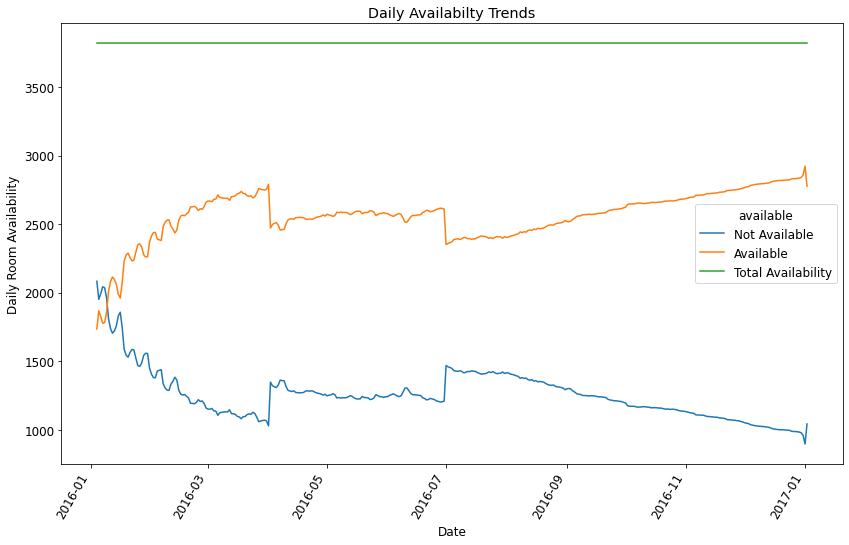

In [18]:
cal_pivot.plot(x_compat=True, rot=60, figsize=(14, 9), xlabel='Date', ylabel='Daily Room Availability', title='Daily Availabilty Trends');

In [19]:
df0 = calendar[['date', 'available']]
df0 = df0[df0['available']==0].groupby(['date']).count().reset_index()
df0.rename(columns={'available': 'Count of Non-Available Properties'}, inplace=True)
df0['day_of_week'] = df0['date'].dt.day_name()
df0.sample(3)

,date,Count of Non-Available Properties,day_of_week
249,2016-09-09,1250,Friday
140,2016-05-23,1220,Monday
110,2016-04-23,1284,Saturday


## Are there any seasonality in the data?

In [20]:
df1 = calendar[['date', 'available']]
df1 = df1[df1['available']==1].groupby(['date']).count().reset_index()
df1.rename(columns={'available': 'Count of Available Properties'}, inplace=True)
df1.sample(3)

,date,Count of Available Properties
188,2016-07-10,2403
302,2016-11-01,2687
23,2016-01-27,2331


In [21]:
df2 = calendar[['date', 'price']][calendar['available']==1].groupby(['date']).mean().reset_index()
df2.rename(columns={'price': 'Daily Average Price'}, inplace=True)
df2.sample(3)

,date,Daily Average Price
165,2016-06-17,153.338527
53,2016-02-26,128.278331
260,2016-09-20,139.862069


In [22]:
trends_df = df2.merge(df1, how='outer', on='date').merge(df0, how='outer', on='date')
trends_df

,date,Daily Average Price,Count of Available Properties,Count of Non-Available Properties,day_of_week
0,2016-01-04,122.085879,1735,2083,Monday
1,2016-01-05,120.681307,1867,1951,Tuesday
2,2016-01-06,120.928258,1826,1992,Wednesday
3,2016-01-07,120.958896,1776,2042,Thursday
4,2016-01-08,127.640853,1782,2036,Friday
...,...,...,...,...,...
360,2016-12-29,138.045503,2835,983,Thursday
361,2016-12-30,144.738380,2840,978,Friday
362,2016-12-31,145.698146,2859,959,Saturday
363,2017-01-01,138.126968,2922,896,Sunday


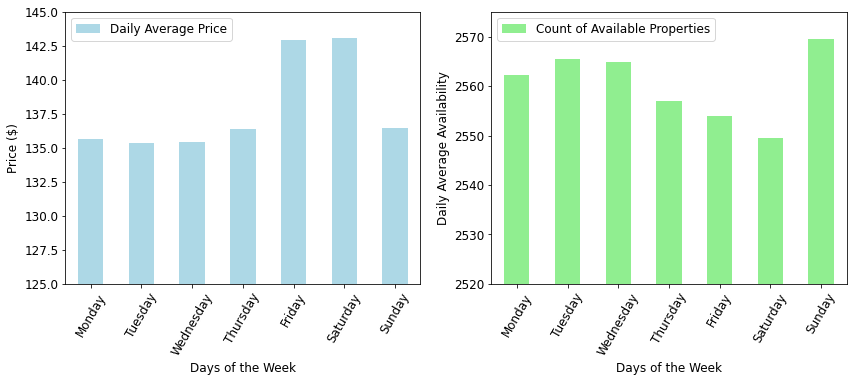

In [86]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# df['Day of Week'] = df['Day of Week'].astype('category', categories=cats, ordered=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
trends_df[['Daily Average Price', 'day_of_week']].groupby(['day_of_week']).mean().reindex(cats).plot(rot=60, kind='bar', ylim=(125, 145), xlabel='Days of the Week', ylabel='Price (\$)', ax=ax1, color='lightblue');
trends_df[['Count of Available Properties', 'day_of_week']].groupby(['day_of_week']).mean().reindex(cats).plot(rot=60, kind='bar', ax=ax2, ylim=(2520, 2575), ylabel='Daily Average Availability', color='lightgreen', xlabel='Days of the Week');

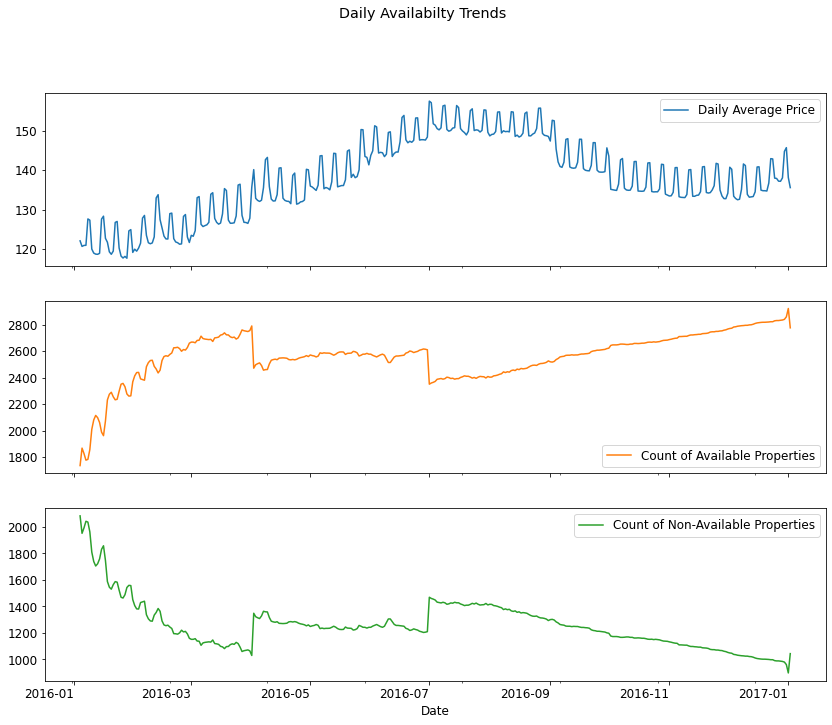

In [66]:
trends_df.plot(x='date', subplots=True, x_compat=True, rot=0, figsize=(14, 12), xlabel='Date', title='Daily Availabilty Trends');

In [62]:
trends_df.head()

,date,Daily Average Price,Count of Available Properties,Count of Non-Available Properties,day_of_week
0,2016-01-04,122.085879,1735,2083,Monday
1,2016-01-05,120.681307,1867,1951,Tuesday
2,2016-01-06,120.928258,1826,1992,Wednesday
3,2016-01-07,120.958896,1776,2042,Thursday
4,2016-01-08,127.640853,1782,2036,Friday


#### Daily Availability Trend for the `calendar` dataframe
- The total availability is constant at 3818 every day... _**Why!!!?**_
- As a result of the constant total, daily available rooms trends are converse with unavailable rooms
- Uptake is steadily decreasing. In Jan 2016 there were more rooms marked 'Not Available' (over 2,000) compared to 'Available' (less tha 1,800)
- As time progresses, the uptake of properties tend to be increasing, rsulting in lesser non-available properties
- There is weekly seasonality in prices, with SUnday having low prices, midweek having lowest prices, and Fridays and Saturdays having highest prices.
- July 2016 has the highest number of available rooms

In [25]:
#show_pandas_profile(calendar, 'calendar')

## 6. Data Wrangling & EDA on `listings` Dataframe

### 6.1 Preview `listings` Dataframe

In [26]:
listings.shape

(3818, 92)

In [27]:
# preview
listings.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1178,176678,https://www.airbnb.com/rooms/176678,20160104002432,2016-01-04,"New townhouse, NW of downtown",First floor cozy & clean bedroom and full bath...,Free bottle of wine included for any bookings ...,First floor cozy & clean bedroom and full bath...,none,NaN,Free bottle of wine included for any bookings ...,There are multiple bus stops within walking di...,https://a2.muscache.com/ac/pictures/13348056/b...,https://a2.muscache.com/im/pictures/13348056/b...,https://a2.muscache.com/ac/pictures/13348056/b...,https://a2.muscache.com/ac/pictures/13348056/b...,844971,https://www.airbnb.com/users/show/844971,Laura,2011-07-20,"Seattle, Washington, United States","Can't live without: sunshine, salt water (swim...",within an hour,100%,100%,f,https://a1.muscache.com/ac/users/844971/profil...,https://a1.muscache.com/ac/users/844971/profil...,Magnolia,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"W Bertona St, Seattle, WA 98199, United States",Magnolia,Lawton Park,Magnolia,Seattle,WA,98199,Seattle,"Seattle, WA",US,United States,47.652216,-122.385481,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Free Parking...",NaN,$64.00,$495.00,"$1,600.00",NaN,NaN,1,$15.00,2,21,3 days ago,t,30,60,90,365,2016-01-04,57,2012-04-10,2015-10-10,97.0,9.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,t,moderate,f,t,1,1.25
2480,6599960,https://www.airbnb.com/rooms/6599960,20160104002432,2016-01-04,Ravenna Retreat,"Welcome to ""The Terrarium!"" Tranquil garden a...","Welcome to ""The Terrarium!"" Our light-filled ...","Welcome to ""The Terrarium!"" Tranquil garden a...",none,NaN,"STREET PARKING ONLY! Parking can be tricky, be...",NaN,https://a2.muscache.com/ac/pictures/85008043/f...,https://a2.muscache.com/im/pictures/85008043/f...,https://a2.muscache.com/ac/pictures/85008043/f...,https://a2.muscache.com/ac/pictures/85008043/f...,33676845,https://www.airbnb.com/users/show/33676845,Jesse,2015-05-18,"Seattle, Washington, United States",Seattle-based filmmaker & lover of life.,within a day,67%,100%,f,https://a2.muscache.com/ac/users/33676845/prof...,https://a2.muscache.com/ac/users/33676845/prof...,Ravenna,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"25th Avenue Northeast, Seattle, WA 98105, Unit...",Ravenna,Ravenna,Other neighborhoods,Seattle,WA,98105,Seattle,"Seattle, WA",US,United States,47.668474,-122.301780,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",NaN,$105.00,NaN,NaN,$100.00,$30.00,2,$15.00,2,14,5 weeks ago,t,6,32,62,337,2016-01-04,13,2015-06-19,2015-12-20,91.0,10.0

### 6.2 `listings` Dataframe Pandas Profile

In [28]:
show_pandas_profile(listings, 'listings')

Number of variables,92
Number of observations,3818
Missing cells,29819
Missing cells (%),8.5%
Total size in memory,1.8 MiB
Average record size in memory,508.0 B
Numeric,29
Categorical,57
DateTime,5
Unsupported,1
"scrape_id has constant value ""20160104002432""",Constant


### 6.3 `listings` Dataframe Constant Columns

From above profile, the following columns are **constant** so they're safe to be dropped
- `scrape_id`
- `last_scraped`
- `experiences_offered`
- `market`
- `country_code`
- `country`
- `has_availability`
- `calendar_last_scraped`
- `requires_license`
- `jurisdiction_names`

In [29]:
listings.drop(['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names'], axis=1, inplace=True, errors = 'ignore',)
listings.shape

(3818, 82)

Additionally, following has been marked as **Unsupported**, though it's actually `NaN`s
- `license`

In [30]:
listings.drop(['license'], inplace=True, errors = 'ignore', axis=1)
listings.shape

(3818, 81)

### 6.4 `listings` url related columns are not necessary as of now

In [31]:
url_cols = [col for col in listings.columns.tolist() if 'url' in col]
url_cols

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [32]:
listings.drop(url_cols, axis=1, inplace=True, errors = 'raise',)
listings.shape

(3818, 73)

### 6.5 `listings` columns with any `NaN`

In [33]:
cols_with_nulls = {}
for col in listings.columns[listings.isnull().sum()/listings.shape[0] > 0].tolist():
    cols_with_nulls[col] = listings[col].isnull().sum()*100/listings.shape[0]
    #print('{:<28}{:>6.2f}%'.format(col+':', listings[col].isnull().sum()*100/listings.shape[0]))
    
sorted_cols = {k: v for k, v in sorted(cols_with_nulls.items(), key=lambda item: item[1])}
# dict(sorted(cols_with_nulls.items(), key=lambda item: item[1]))
for k, v in sorted_cols.items():
    print('{:<28}{:>6.2f}%'.format(k+':', v))

property_type:                0.03%
beds:                         0.03%
host_name:                    0.05%
host_since:                   0.05%
host_is_superhost:            0.05%
host_listings_count:          0.05%
host_total_listings_count:    0.05%
host_has_profile_pic:         0.05%
host_identity_verified:       0.05%
bedrooms:                     0.16%
zipcode:                      0.18%
host_location:                0.21%
bathrooms:                    0.42%
summary:                      4.64%
host_neighbourhood:           7.86%
neighbourhood:               10.90%
host_response_time:          13.70%
host_response_rate:          13.70%
space:                       14.90%
first_review:                16.42%
last_review:                 16.42%
reviews_per_month:           16.42%
review_scores_rating:        16.95%
review_scores_communication: 17.05%
review_scores_cleanliness:   17.10%
review_scores_location:      17.16%
review_scores_value:         17.18%
review_scores_accuracy:     

### 6.6 Drop `listings` columns with `NaN`s > 40%

In [34]:
cols_with_nulls = {}
for col in listings.columns[listings.isnull().sum()/listings.shape[0] > 0].tolist():
    cols_with_nulls[col] = listings[col].isnull().sum()*100/listings.shape[0]
    #print('{:<28}{:>6.2f}%'.format(col+':', listings[col].isnull().sum()*100/listings.shape[0]))
    
sorted_cols = {k: v for k, v in sorted(cols_with_nulls.items(), key=lambda item: item[1])}
# dict(sorted(cols_with_nulls.items(), key=lambda item: item[1]))
for k, v in sorted_cols.items():
    if v >= 40:
        print('{:<28}{:>6.2f}%'.format(k+':', v))
        listings.drop([k], axis=1, inplace=True, errors = 'raise',)

notes:                       42.06%
weekly_price:                47.38%
security_deposit:            51.13%
monthly_price:               60.27%
square_feet:                 97.46%


### 6.7 Drop `listings`  rows with `NaN`s < = 10%

In [35]:
for k, v in sorted_cols.items():
    if v <= 10:
        print('{:<28}{:>6.2f}%'.format(k+':', v))
        listings.dropna(axis = 0, how = 'any', subset=[k], inplace = True)
listings.shape

property_type:                0.03%
beds:                         0.03%
host_name:                    0.05%
host_since:                   0.05%
host_is_superhost:            0.05%
host_listings_count:          0.05%
host_total_listings_count:    0.05%
host_has_profile_pic:         0.05%
host_identity_verified:       0.05%
bedrooms:                     0.16%
zipcode:                      0.18%
host_location:                0.21%
bathrooms:                    0.42%
summary:                      4.64%
host_neighbourhood:           7.86%


(3322, 68)

In [36]:
listings.shape

(3322, 68)

### 6.8 Other `listings` columns not needed  as of now --WIP

In [37]:
['name', 'city']

['name', 'city']

### 6.9 Convert `string` amounts to `floats`

In [38]:
convert_price_to_float(listings, cols=['price', 'extra_people', 'cleaning_fee'])

Converting price ...
Converting extra_people ...
Converting cleaning_fee ...


## 7. What factors highly influence the prices?

### 7.1 Correlation Matrix

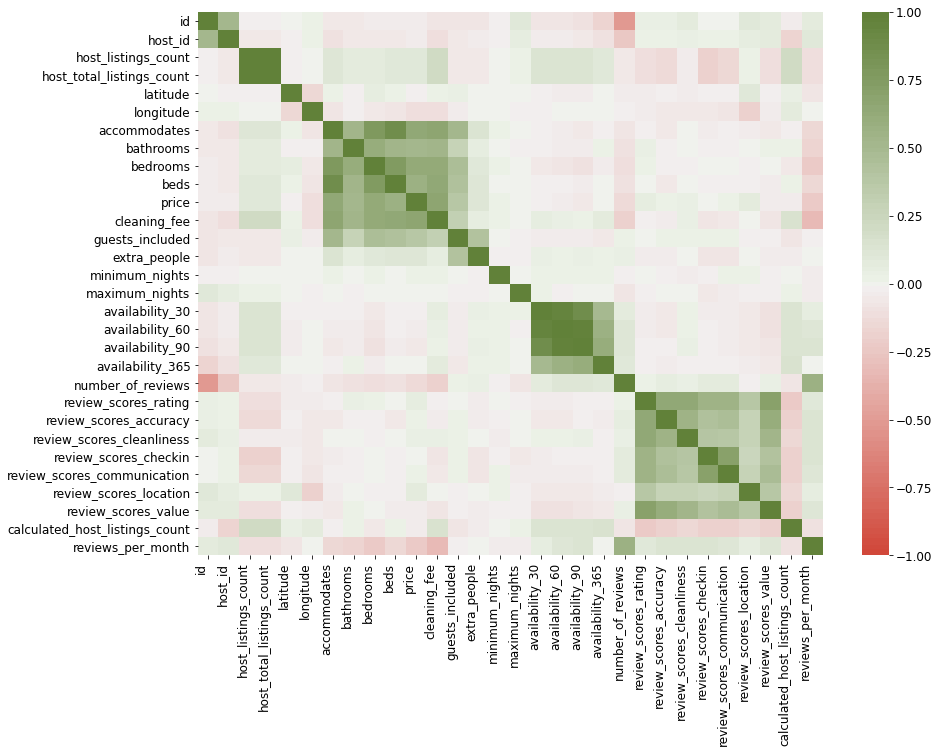

In [88]:
corr = listings.corr()
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 110, n=105), square=False, ax=ax) # haven't gotten that red right
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right');

- There appears to be a positive correlation between price and beds, bedrooms, bathrooms, and the number of people the property can  accommodated
- The number of people a property can  accommodate are closely related tonumber of beds and number of bedrooms _so consider dropping it_

### 7.2 Room Type Proportions (%)

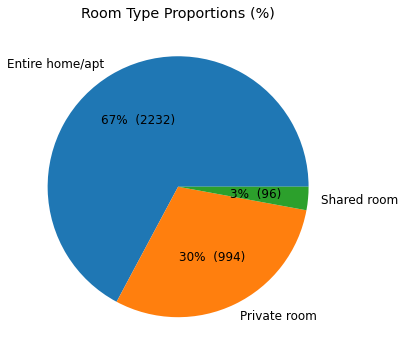

In [40]:
# listings['room_type'].value_counts().plot.pie(figsize=(6, 6), ylabel='', title='Property Type Proportions (%)', autopct='%.2f');

plt.figure(figsize=(6,6))
values = listings['room_type'].value_counts().tolist()
labels = listings['room_type'].value_counts().index.tolist()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.title('Room Type Proportions (%)')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

### 7.3 Property Type Proportions (%)

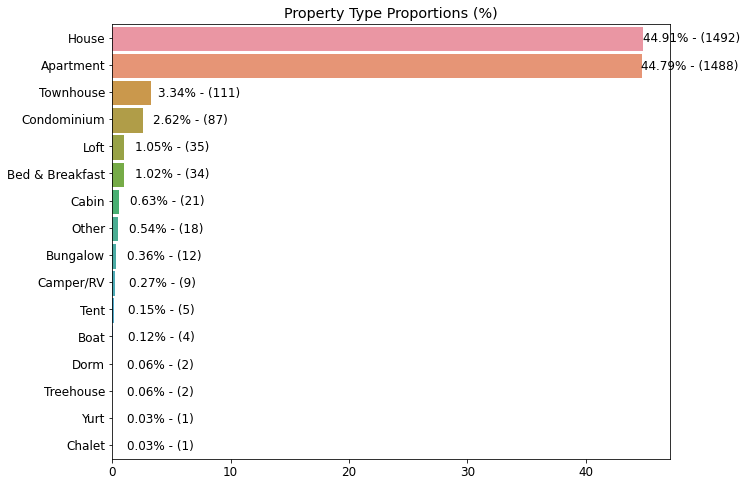

In [41]:
values_pc = [round(100*val, 2) for val in listings['property_type'].value_counts(normalize=True).to_list()]
values = listings['property_type'].value_counts().to_list()
labels = listings['property_type'].value_counts().index.to_list()

plt.figure(figsize=(10,8))
plt.title('Property Type Proportions (%)')
ax = sns.barplot(x=values_pc, y=labels, orient='h')

# Annotate every single Bar with its value, based on it's width
i = 0
for p in ax.patches:
    width = p.get_width()
    plt.text(4+p.get_width(), p.get_y()+0.55*p.get_height(), '{:1.2f}% - ({})'.format(width, values[i]), ha='center', va='center')
    i += 1

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.9)
plt.show()

Over 89% of the properties type consist of **House** or **Apartment**

### 7.4 Room Type and No. of Bedrooms

In [42]:
listings[['room_type', 'bedrooms']].groupby(['bedrooms', 'room_type']).size().unstack(fill_value=0)

room_type,Entire home/apt,Private room,Shared room
bedrooms,,,
0.0,333,0,0
1.0,990,994,96
2.0,570,0,0
3.0,249,0,0
4.0,62,0,0
5.0,23,0,0
6.0,4,0,0
7.0,1,0,0


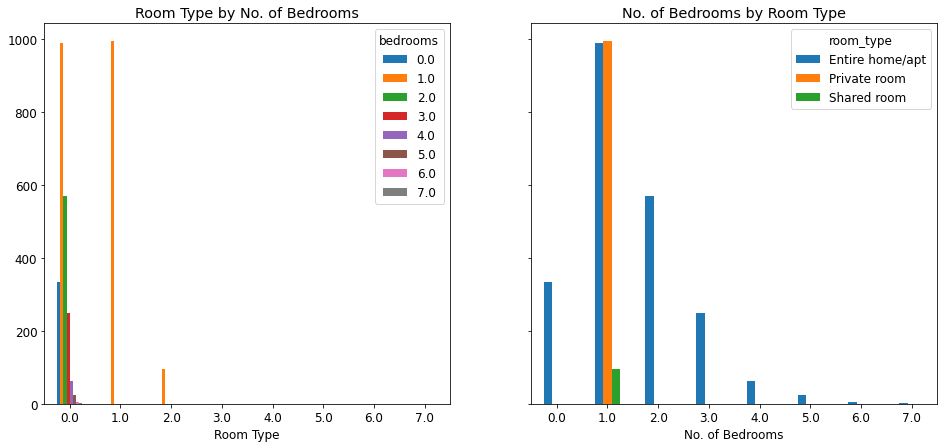

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(16,7))
br1 = listings[['room_type', 'bedrooms']].groupby(['room_type', 'bedrooms']).size().unstack(fill_value=0)
br2 = listings[['room_type', 'bedrooms']].groupby(['bedrooms', 'room_type']).size().unstack(fill_value=0)
br1.plot(kind='bar', ax=axes[0], rot=0, xlabel='Room Type', title='Room Type by No. of Bedrooms')
br2.plot(kind='bar', ax=axes[1], rot=0, xlabel='No. of Bedrooms', title='No. of Bedrooms by Room Type');

### 7.5 Room Type and Property Type and Price

In [44]:
property_room = listings[['property_type', 'room_type', 'price']].groupby(['property_type', 'room_type']).mean().unstack(fill_value=0)
property_room.sample(5)

price                                   
room_type     Entire home/apt Private room Shared room
property_type                                         
Cabin          114.125000      74.400000     0.000000 
Bungalow       123.454545      70.000000     0.000000 
Apartment      133.259824      80.284264    52.454545 
Tent            65.000000      50.000000    25.000000 
Condominium    170.000000      90.411765    75.000000

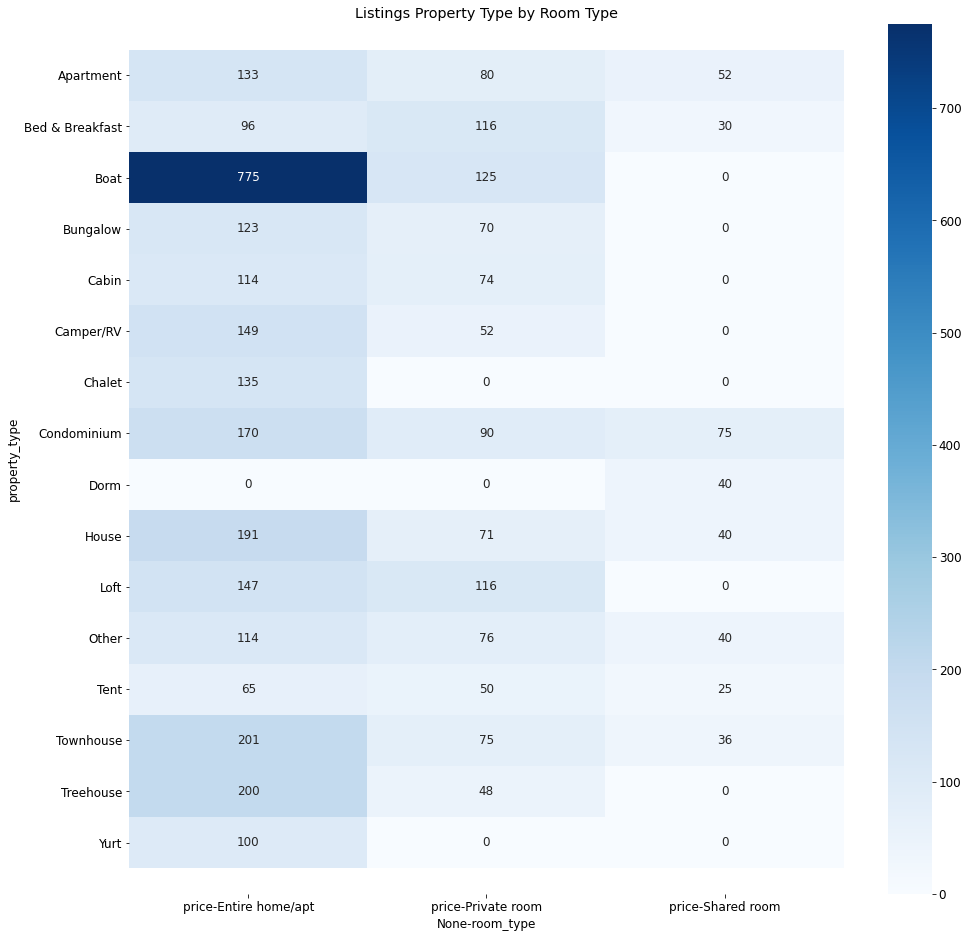

In [45]:
plt.figure(figsize=(16,16))
plt.title('Listings Property Type by Room Type')
ax = sns.heatmap(property_room, annot=True, fmt=".0f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 7.6 Average Price Listings Property Type by Number of Bedrooms

In [46]:
property_bedroom = listings[['property_type', 'bedrooms', 'price']].groupby(['property_type', 'bedrooms']).mean().unstack(fill_value=0)
property_bedroom.sample(5)

price                                                        \
bedrooms      0.0         1.0         2.0         3.0         4.0    5.0    
property_type                                                               
Townhouse      120.000000   78.895522  196.720000  236.333333  337.5  0.0   
Loft           112.090909  134.761905  286.666667    0.000000    0.0  0.0   
Chalet           0.000000  135.000000    0.000000    0.000000    0.0  0.0   
Camper/RV      197.500000   72.200000    0.000000    0.000000    0.0  0.0   
Other           92.250000   89.076923  150.000000    0.000000    0.0  0.0   

                         
bedrooms      6.0  7.0   
property_type            
Townhouse      0.0  0.0  
Loft           0.0  0.0  
Chalet         0.0  0.0  
Camper/RV      0.0  0.0  
Other          0.0  0.0

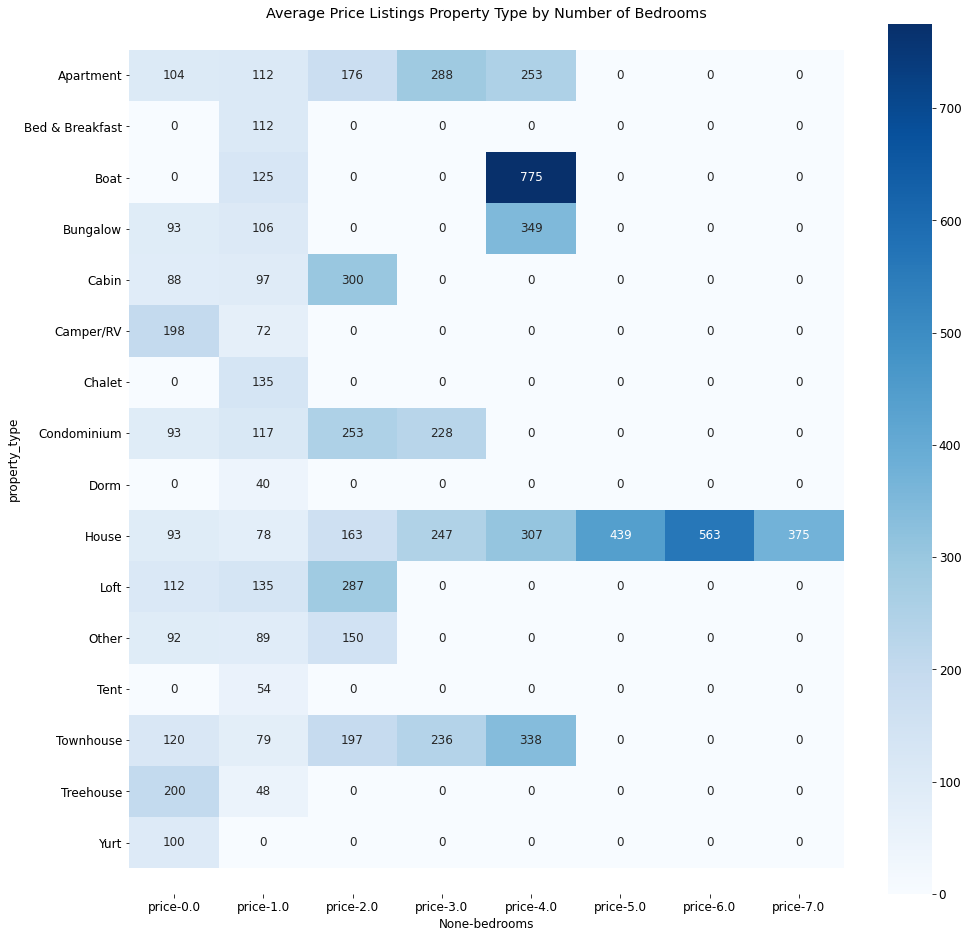

In [47]:
plt.figure(figsize=(16,16))
plt.title('Average Price Listings Property Type by Number of Bedrooms')
ax = sns.heatmap(property_bedroom, annot=True, fmt=".0f", cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- Property types **House** and **Apartment** has the highest number of bedrooms
- The deep blue tends to be towards the right where there are more number of bedrooms

### 7.7 Neighbourhood and Price

In [48]:
neighbourhood_cleansed = listings[['neighbourhood_cleansed', 'price']]
neighbourhood_cleansed.sample(5)

,neighbourhood_cleansed,price
1617,First Hill,250.0
3509,Madison Park,109.0
2497,Ravenna,39.0
1987,Greenwood,175.0
1091,Eastlake,135.0


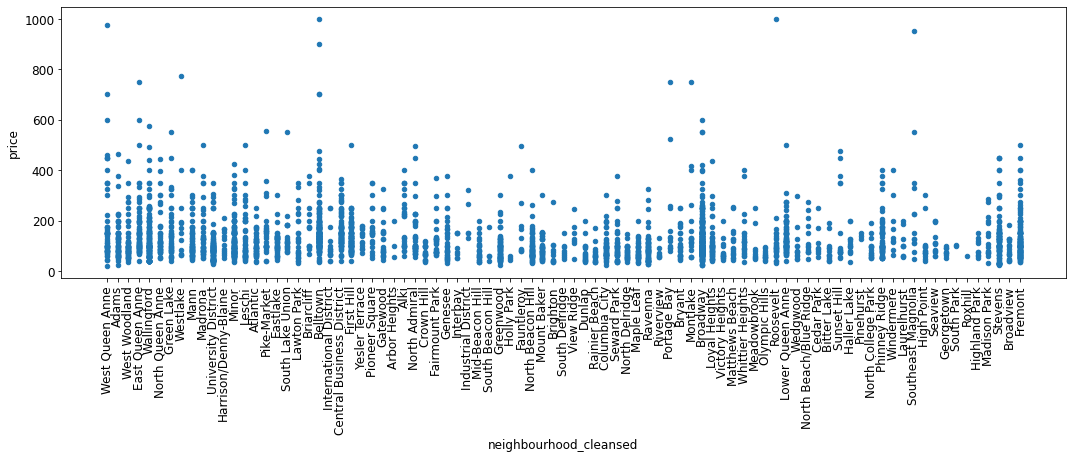

In [49]:
neighbourhood_cleansed.plot(kind='scatter', x='neighbourhood_cleansed', y='price', figsize=(18,5), rot=90);

### 7.8 Amenities

In [50]:
# Amenities of listings at the bottom when sorted by price
bot_amen = listings[['amenities','price']].sort_values('price').head(10)[['amenities']]   # create the list
bot_amen['amenities'] = bot_amen['amenities'].str.replace(r'[^a-zA-Z]+', ' ', regex=True) # remove unnecessary chars

# Amenities of listings at the top when sorted by price
top_amen = listings[['amenities','price']].sort_values('price').tail(10)[['amenities']]   # create the list
top_amen['amenities'] = top_amen['amenities'].str.replace(r'[^a-zA-Z]+', ' ', regex=True) # remove unnecessary chars

In [51]:
top_amen_word_tokens = nltk.word_tokenize(' '.join(top_amen['amenities'].tolist()))
bot_amen_word_tokens = nltk.word_tokenize(' '.join(bot_amen['amenities'].tolist()))

In [52]:
top_amen_filtered=[word for word in top_amen_word_tokens if word not in stopwords.words('english')] 
bot_amen_filtered=[word for word in bot_amen_word_tokens if word not in stopwords.words('english')] 

In [53]:
wnl = WordNetLemmatizer()

top_amen_data=[wnl.lemmatize(data) for data in top_amen_filtered]
top_amen_words = ' '.join(top_amen_data)

bot_amen_data=[wnl.lemmatize(data) for data in bot_amen_filtered]
bot_amen_words = ' '.join(bot_amen_data)

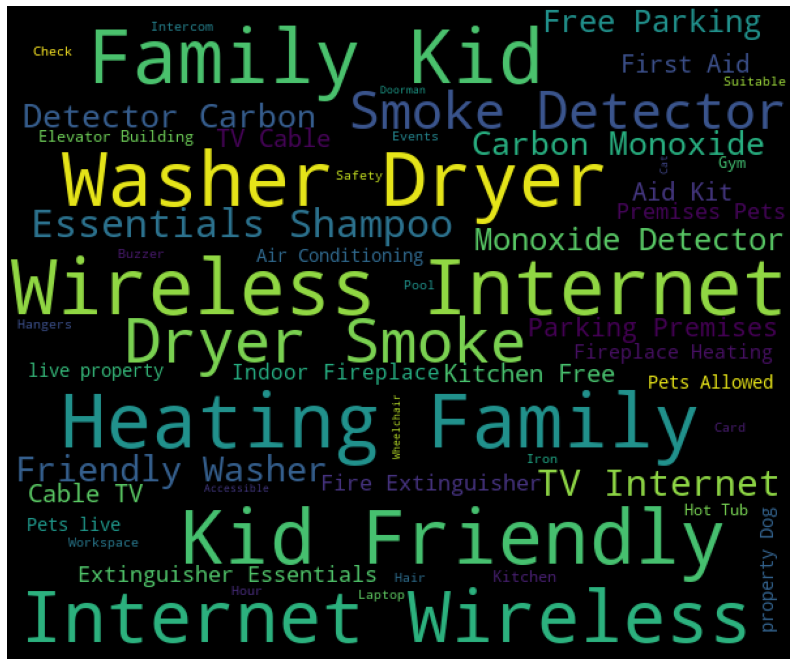

In [54]:
display_wordcloud(top_amen_words)

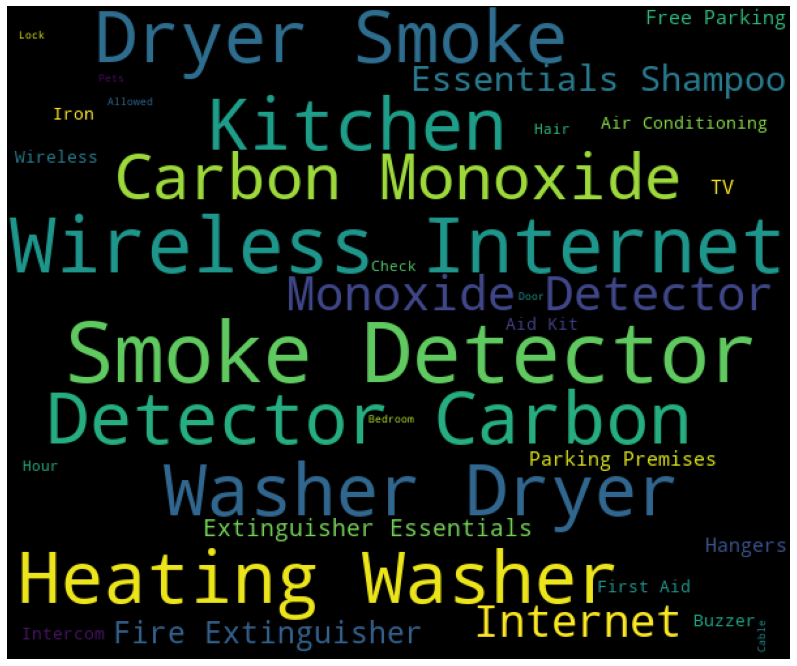

In [55]:
display_wordcloud(bot_amen_words)

The following words exist in amenities in the top 10 most expensive properties but do not exist in bottom 10

- Accessible
- Elevator
- Fireplace
- Gym
- Pool
- Tub
- Wheelchair
- Workspace

## 8. What is the Concentration of Properties in Seattle

In [56]:
from shapely.geometry import Point, Polygon
import descartes
import geopandas as gpd

In [57]:
crs = {'init': 'epsg:4326'}

In [58]:
geometry = [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
geometry[:3]

In [60]:
geo_df = gpd.GeoDataFrame(listings, crs=crs, geometry=geometry)
geo_df[['geometry']].sample(5)

c:\tutes\udacity\seattleairbnbopendata\venv\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,geometry
2355,POINT (-122.27367 47.56000)
62,POINT (-122.36769 47.63140)
2380,POINT (-122.36671 47.56416)
1624,POINT (-122.32360 47.61323)
1401,POINT (-122.35177 47.61715)


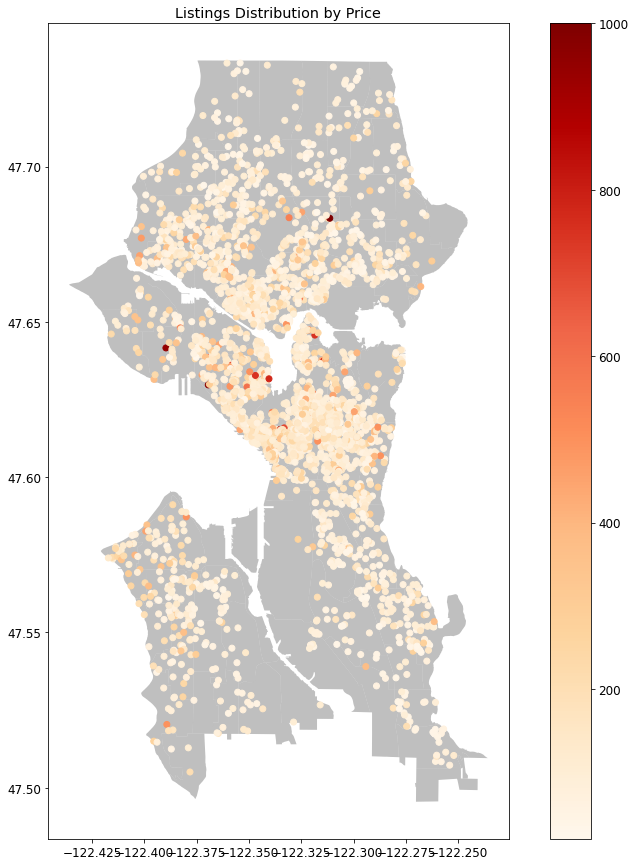

In [93]:
# https://data-seattlecitygis.opendata.arcgis.com/datasets/mandatory-housing-affordability-mha-fee-areas/explore?location=47.614630%2C-122.336904%2C11.71
seattle_map = gpd.read_file('./geodata/Mandatory_Housing_Affordability__MHA__Fee_Areas.shp') # requires Mandatory_Housing_Affordability__MHA__Fee_Areas.shx

# http://data.insideairbnb.com/united-states/wa/seattle/2021-07-14/visualisations/neighbourhoods.geojson
neighbourhoods = gpd.read_file('./geodata/neighbourhoods.geojson')

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Listings Distribution by Price')
# seattle_map.plot(ax=ax, color='grey', alpha=0.5);
neighbourhoods.plot(ax=ax, color='grey', alpha=0.5);
geo_df.plot(ax=ax, column='price', legend=True, cmap='OrRd');

## Summary of the Analysis
It can be concluded that prices of listings depends upon following factors:

<ol>
    <li>The <em>RoomType</em> whole property costs the highest amount, followed by private room and shared apartment.</li>
    <li>The <em>PropertyType</em> apartments and houses take up Ove 89% of all listings.</li>
    <li>The <em>number of bedrooms</em> the property have and neighborhood of the property</li>
    <li>The <em>amenities</em> provided also contributes to higher property prices.</li>
</ol>

In [ ]:
##